In [134]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

In [135]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        

        
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
        
        
    def CheckWallLimits(self,limits,dim=2):
        
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - self.v[i]
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - self.v[i]
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
        
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector

    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius

In [136]:
# Discretization
dt = 0.01
tmax = 10
t = np.arange(0,tmax+dt,dt)

In [137]:
def GetParticles(NParticles,Limit,Velo,Dim=2,dt=0.1):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.random.uniform( -Limit+1.0, Limit-1.0, size=Dim )
        v0 = np.random.uniform( -Velo, Velo, size=Dim)
        a0 = np.zeros(Dim)
        
        p = Particle(x0,v0,a0,t,1.,1.0,i)
        
        Particles_.append(p)
        
    return Particles_

In [138]:
def CreateParticle(pos,Velo,acele,t,R=1):
    return Particle(pos,velo,acele,t,1,R,1)
    

In [139]:
Limits = np.array([20.,20.])
pos=np.array([-15.,5.])
velo=np.array([1.,0.])
acele=np.array([0.,-9.8])

In [140]:
def RunSimulation(t,P, Limits):
    
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        P.CheckWallLimits(Limits)
        P.Evolution(it)
        
        
    return P

In [141]:
P=CreateParticle(pos,velo,acele,t)
P = RunSimulation(t,P, Limits)


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 27055.32it/s]


In [142]:
print(P.GetVelocityVector())

[[  1.      0.   ]
 [  1.     -0.098]
 [  1.     -0.196]
 ...
 [  1.    -10.584]
 [  1.    -10.682]
 [  1.    -10.78 ]]


In [143]:
def ReduceTime(t,factor):
    
    P.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [154]:
redt = ReduceTime(t,2)

<IPython.core.display.Javascript object>


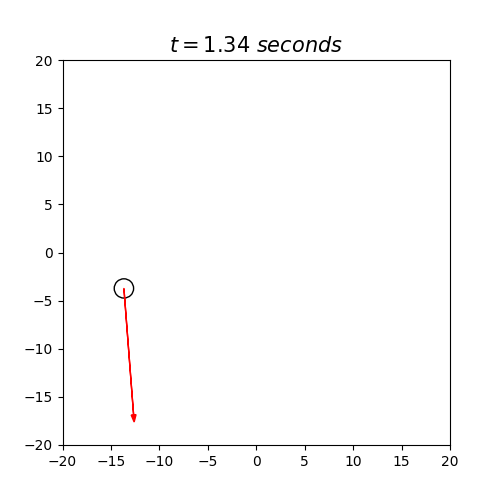

In [179]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(t[i]), fontsize=15)
    
    x = P.GetPositionVector()[i,0]
    y = P.GetPositionVector()[i,1]
        
    vx = P.GetVelocityVector()[i,0]
    vy = P.GetVelocityVector()[i,1]
        
    circle = plt.Circle( (x,y), P.GetR(), color='k', fill=False )
    plot = ax.add_patch(circle)
    plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)

In [159]:
Limits = np.array([20.,20.])
dt = 0.01
tmax = 10
t = np.arange(0,tmax+dt,dt)

In [176]:
def RunSimulation(t,NParticles = 100, Velo = 6):
    
    Particles = GetParticles(NParticles,Limits[0],Velo = Velo, Dim=3,dt=dt)
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits(Limits)
            Particles[i].Evolution(it)
        
        
    return Particles

In [177]:
Gas_Particles= RunSimulation(t)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:02<00:00, 398.09it/s]


In [175]:
print(Gas_Particles)

[<__main__.Particle object at 0x000001DA793C3B08>, <__main__.Particle object at 0x000001DA793C3288>, <__main__.Particle object at 0x000001DA79349E08>, <__main__.Particle object at 0x000001DA793C3588>, <__main__.Particle object at 0x000001DA79367DC8>, <__main__.Particle object at 0x000001DA79367AC8>, <__main__.Particle object at 0x000001DA79367D88>, <__main__.Particle object at 0x000001DA79367F08>, <__main__.Particle object at 0x000001DA78FCCCC8>, <__main__.Particle object at 0x000001DA79397A08>, <__main__.Particle object at 0x000001DA79367F88>, <__main__.Particle object at 0x000001DA79367C88>, <__main__.Particle object at 0x000001DA79367F48>, <__main__.Particle object at 0x000001DA79367B48>, <__main__.Particle object at 0x000001DA79367988>, <__main__.Particle object at 0x000001DA793615C8>, <__main__.Particle object at 0x000001DA78FD85C8>, <__main__.Particle object at 0x000001DA78D00C48>, <__main__.Particle object at 0x000001DA78D00648>, <__main__.Particle object at 0x000001DA78D00A48>,

In [164]:
def ReduceTime(t,factor):
    
    for p in Gas_Particles:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [165]:
redt = ReduceTime(t,10)

<IPython.core.display.Javascript object>


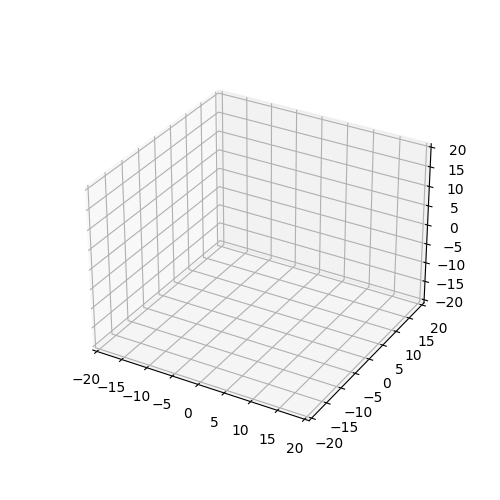

In [178]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    ax = plt.axes(projection='3d')
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])
    ax.set_zlim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    for p in Gas_Particles:
        xs=[]
        ys=[]
        zs=[]
        
        x = xs.append(p.GetPositionVector()[i,0])
        y = ys.append(p.GetPositionVector()[i,1])
        z = zs.append(p.GetPositionVector()[i,2])
        
        #vx = p.GetVelocityVector()[i,0]
        #vy = p.GetVelocityVector()[i,1]
        
        #circle = plt.Circle( (x,y,z), p.GetR(), color='k')
        #plot = ax.add_patch(circle)
        #plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
    xs=np.array(xs)
    ys=np.array(ys)
    zs=np.array(zs)
        
    plot=ax.scatter(xs,ys,zs)
        
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)